# [CDAF] Atividade 2

## Nome e matrícula
Nome: Lucas Affonso Pires
Matrícula: 2023028420

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2023 do FBRef.

## Questão 1
- Acesse os dados do arquivo BR24FIXTURES.txt (https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures). Dica: use a função `pd.read_csv()` com o parâmetro `sep='\t'`.
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

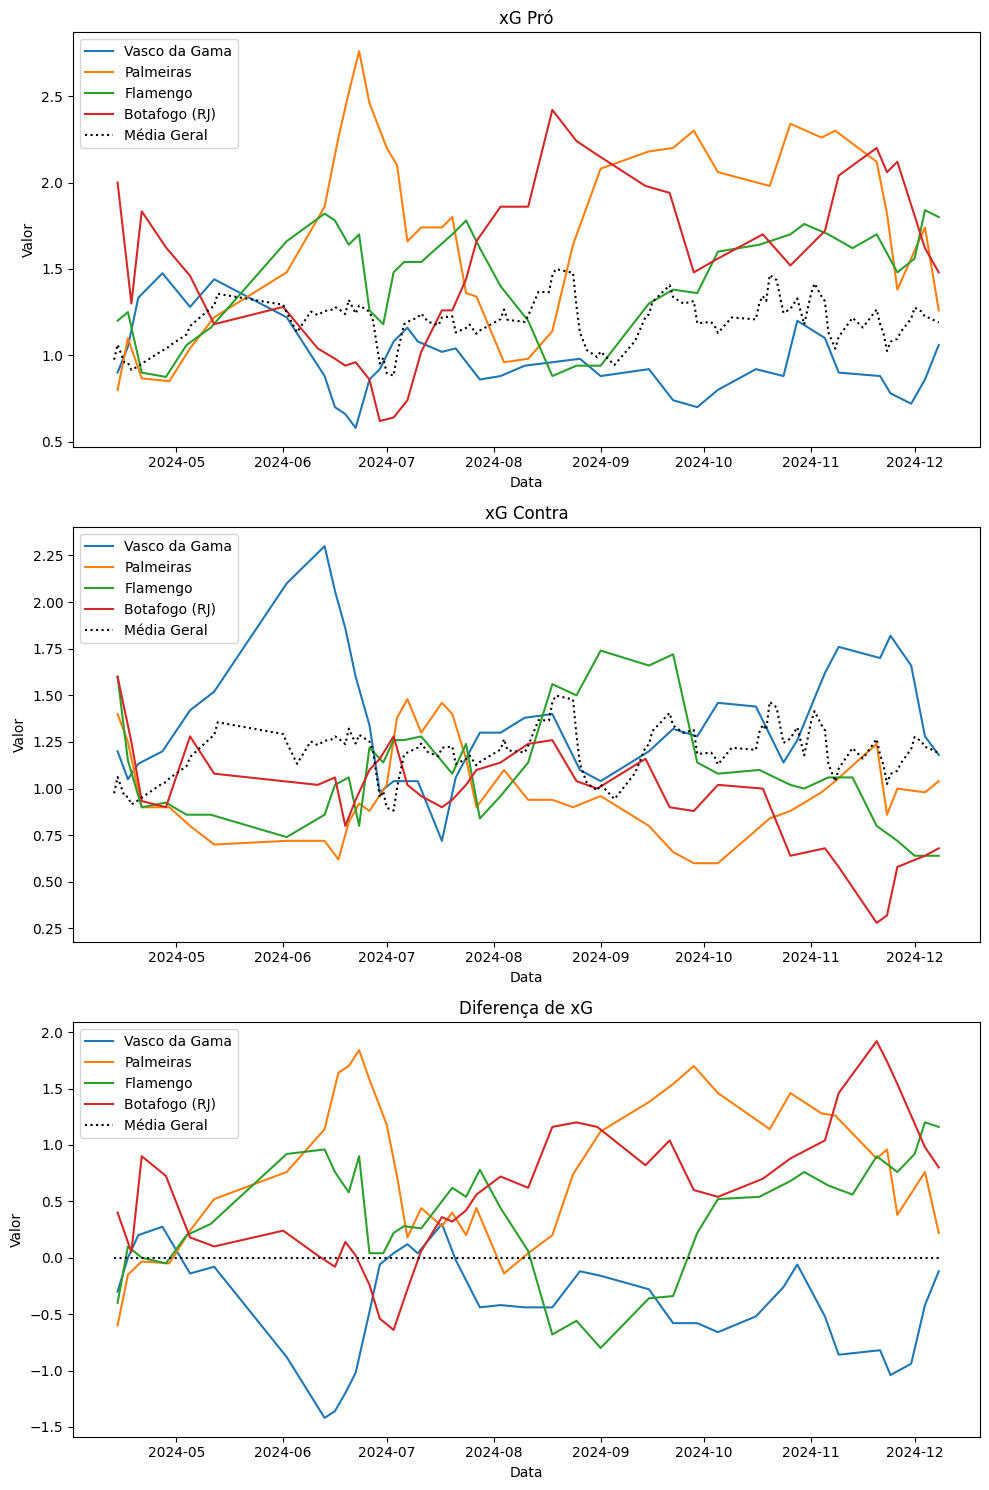

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BR24FIXTURES.txt", sep='\t')

df['Date'] = pd.to_datetime(df['Date'])

df_home = df[['Date', 'Home', 'xG', 'xG.1']].copy()
df_away = df[['Date', 'Away', 'xG.1', 'xG']].copy()

df_home.columns = ['Date', 'Team', 'xG For', 'xG Against']
df_away.columns = ['Date', 'Team', 'xG For', 'xG Against']

df_long = pd.concat([df_home, df_away])
df_long['xG Diff'] = df_long['xG For'] - df_long['xG Against']

times = ["Vasco da Gama", "Palmeiras", "Flamengo", "Botafogo (RJ)"]

def calcular_media_movel(df, time, coluna):
    return (df[df['Team'] == time]
            .sort_values(by='Date')
            .set_index('Date')[coluna]
            .rolling(window=5, min_periods=1)
            .mean())

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

estatisticas = ['xG For', 'xG Against', 'xG Diff']
nomes_estatisticas = ['xG Pró', 'xG Contra', 'Diferença de xG']

for i, estat in enumerate(estatisticas):
    media_geral = df_long.sort_values(by='Date').groupby('Date')[estat].mean().rolling(window=5, min_periods=1).mean()

    for time in times:
        media_movel = calcular_media_movel(df_long, time, estat)
        axes[i].plot(media_movel.index, media_movel, label=time)

    axes[i].plot(media_geral.index, media_geral, linestyle='dotted', color='black', label='Média Geral')
    axes[i].set_title(nomes_estatisticas[i])
    axes[i].set_xlabel("Data")
    axes[i].set_ylabel("Valor")
    axes[i].legend()

plt.tight_layout()
plt.show()

Vemos, analisando as imagens geradas, que times que foram melhores no campeonato tendem a ter uma diferença de xGpró acima da média enquanto a média de xGcontra é menor, porém equipes que terminaram um pouco a baixo na tabela como o Vasco tendem a ter um xGdiff menor que 0.

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

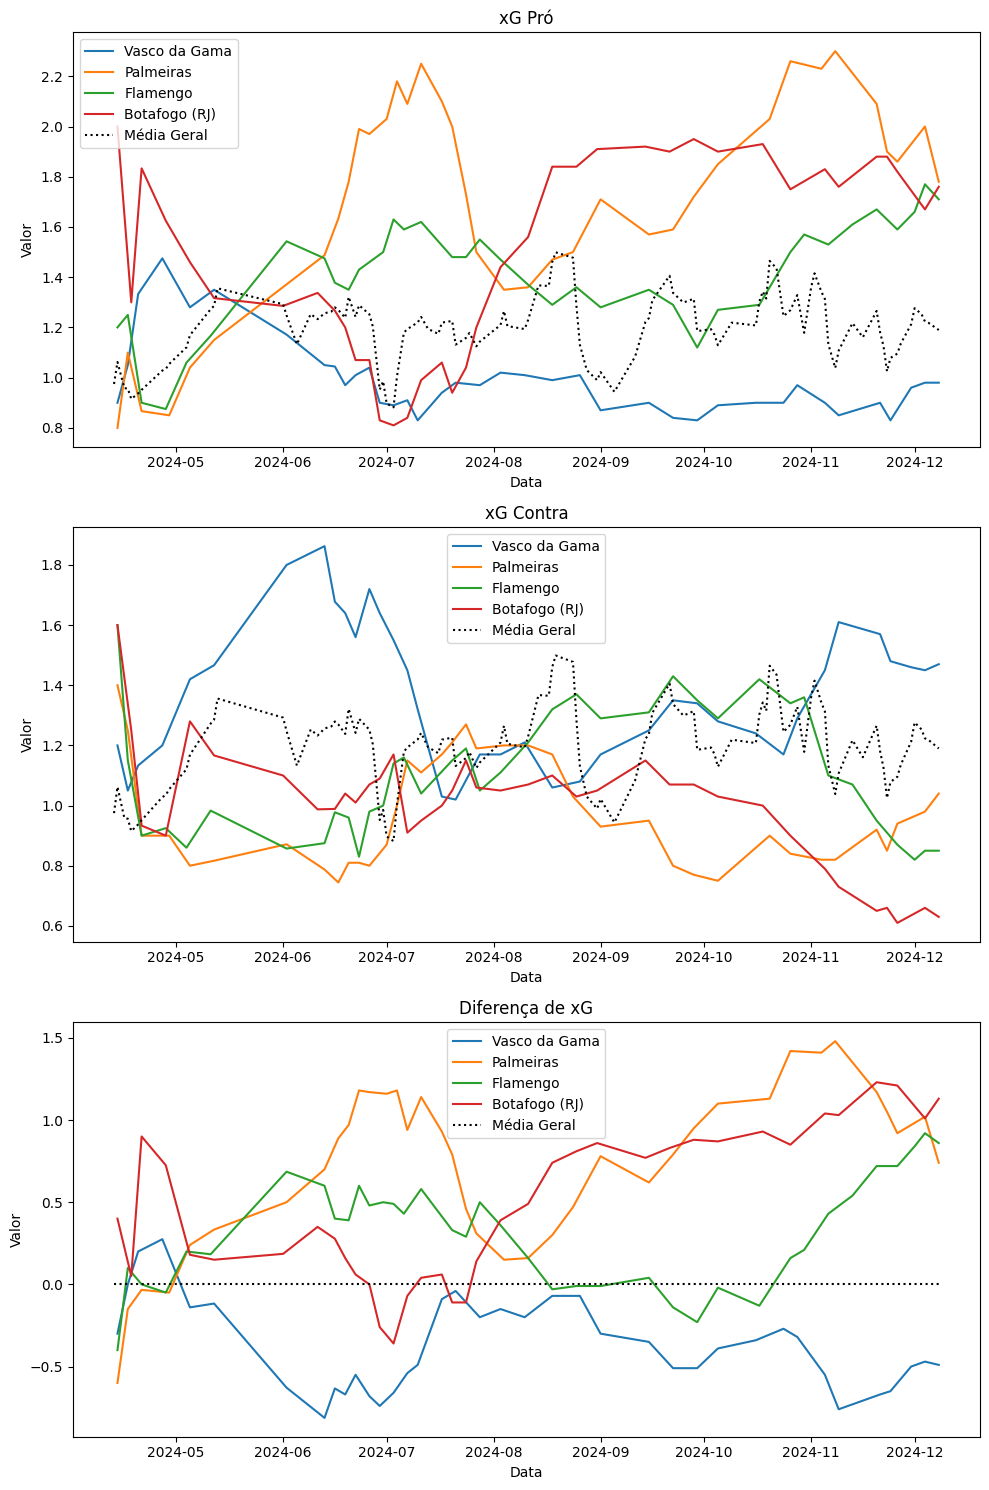

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BR24FIXTURES.txt", sep='\t')

df['Date'] = pd.to_datetime(df['Date'])

df_home = df[['Date', 'Home', 'xG', 'xG.1']].copy()
df_away = df[['Date', 'Away', 'xG.1', 'xG']].copy()

df_home.columns = ['Date', 'Team', 'xG For', 'xG Against']
df_away.columns = ['Date', 'Team', 'xG For', 'xG Against']

df_long = pd.concat([df_home, df_away])
df_long['xG Diff'] = df_long['xG For'] - df_long['xG Against']

times = ["Vasco da Gama", "Palmeiras", "Flamengo", "Botafogo (RJ)"]

def calcular_media_movel(df, time, coluna):
    return (df[df['Team'] == time]
            .sort_values(by='Date')
            .set_index('Date')[coluna]
            .rolling(window=10, min_periods=1)
            .mean())

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

estatisticas = ['xG For', 'xG Against', 'xG Diff']
nomes_estatisticas = ['xG Pró', 'xG Contra', 'Diferença de xG']

for i, estat in enumerate(estatisticas):
    media_geral = df_long.sort_values(by='Date').groupby('Date')[estat].mean().rolling(window=5, min_periods=1).mean()

    for time in times:
        media_movel = calcular_media_movel(df_long, time, estat)
        axes[i].plot(media_movel.index, media_movel, label=time)

    axes[i].plot(media_geral.index, media_geral, linestyle='dotted', color='black', label='Média Geral')
    axes[i].set_title(nomes_estatisticas[i])
    axes[i].set_xlabel("Data")
    axes[i].set_ylabel("Valor")
    axes[i].legend()

plt.tight_layout()
plt.show()

A diferença observada da primeira questão é que passamos a observar melhor como as equipes tendem a ter seu xG em média, ignorando de certa maneira fases boas onde a equipe ganhou mais e fases onde a equipe rendeu menos, tendo uma visão mais geral.

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Leia o arquivo BR24PLAYERS.txt
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [74]:
import pandas as pd

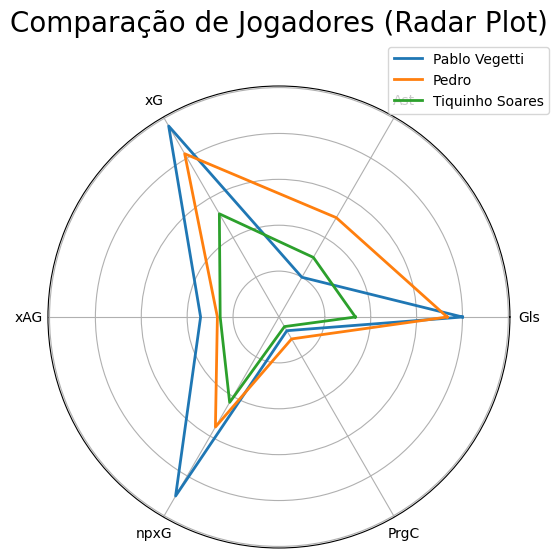

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Carregar o dataset
df = pd.read_csv("BR24PLAYERS.txt", sep='\t')

# Filtrando apenas as colunas relevantes
columns = ['Player', 'Gls', 'Ast', 'xG', 'xAG', 'npxG', 'PrgC']
df = df[columns]

# Verificar se todos os jogadores estão na lista antes de prosseguir
players_to_compare = ['Pablo Vegetti', 'Pedro', 'Tiquinho Soares']

# Normalizando os dados para as colunas relevantes
attributes = ['Gls', 'Ast', 'xG', 'xAG', 'npxG', 'PrgC']
normalized_data = df[attributes].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Função para criar o gráfico de radar
def radar_plot(df, normalized_data, attributes, player_names):
    num_vars = len(attributes)

    # Ângulo das variáveis no gráfico
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Ajustando para o gráfico ser circular
    angles += angles[:1]

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for player in player_names:
        if player not in df['Player'].values:
            print(f"Jogador {player} não encontrado no DataFrame!")
            continue

        values = normalized_data.loc[df['Player'] == player, attributes].values.flatten().tolist()
        values += values[:1]  # Fechar o gráfico no primeiro ponto

        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid')

    # Adicionando título e labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, rotation=45)

    plt.title('Comparação de Jogadores (Radar Plot)', size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Gerando o radar plot
radar_plot(df, normalized_data, attributes, players_to_compare)

(Apenas justificando a não utilização da biblioteca mplsoccer) O dataset fornecido acabou sendo um pouco limitante, já que seus dados são pouco expressivos no que se refere aos aspectos do jogo de futebol. Além disso, houveram problemas de extração dos dados ao tentar utilizar as colunas por conta do .txt, não sei se por erro meu ou erro do arquivo, além de ocorrer problemas na normalização dos dados ao tentar utilizar a mplsoccer. Assim, nas três questões seguintes optei por comparar diretamente os jogadores entre si, concluindo visualmente qual se destaca quanto a cada atributo.

Os dados escolhidos são aqueles que se referem a participação do atacante na construção e conclusão do gol, comparando atacantes quanto a sua capacidade de fazer gols e participar nas jogadas com assistências. Quanto aos jogadores escolhi 3 jogadores considerados os melhores do campeonatos. Analisando, percebe-se que o atacante Vegetti se destaca no quesito gols, porém é menos participativo que o atacante Pedro na construção do gol, com assistências e progressão de campo.

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

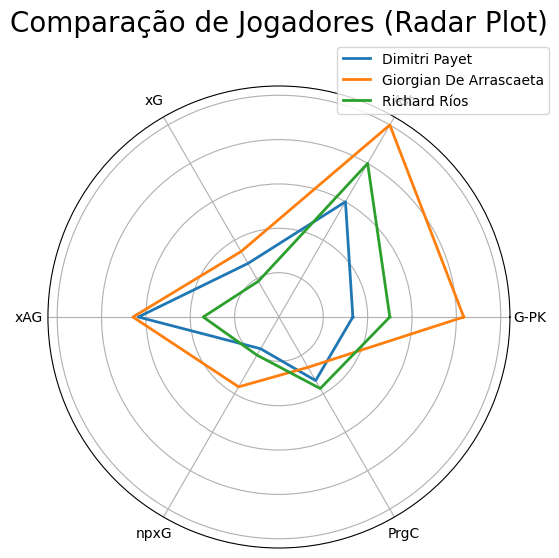

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Carregar o dataset
df = pd.read_csv("BR24PLAYERS.txt", sep='\t')

# Filtrando apenas as colunas relevantes
columns = ['Player', 'G-PK', 'Ast', 'xG', 'xAG', 'npxG', 'PrgC']
df = df[columns]

# Verificar se todos os jogadores estão na lista antes de prosseguir
players_to_compare = ['Dimitri Payet', 'Giorgian De Arrascaeta', 'Richard Ríos']

# Normalizando os dados para as colunas relevantes
attributes = ['G-PK', 'Ast', 'xG', 'xAG', 'npxG', 'PrgC']
normalized_data = df[attributes].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Função para criar o gráfico de radar
def radar_plot(df, normalized_data, attributes, player_names):
    num_vars = len(attributes)

    # Ângulo das variáveis no gráfico
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Ajustando para o gráfico ser circular
    angles += angles[:1]

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for player in player_names:
        if player not in df['Player'].values:
            print(f"Jogador {player} não encontrado no DataFrame!")
            continue

        values = normalized_data.loc[df['Player'] == player, attributes].values.flatten().tolist()
        values += values[:1]  # Fechar o gráfico no primeiro ponto

        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid')

    # Adicionando título e labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, rotation=45)

    plt.title('Comparação de Jogadores (Radar Plot)', size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Gerando o radar plot
radar_plot(df, normalized_data, attributes, players_to_compare)

Similarmente, ao comparar os meias acima, percebe-se que o meia Arrascaeta é o que mais se destaca na criação de jogadas com o passe final e na execução de gols diretamente, porém fica ligeiramente atrás de Payet e Richard Ríos na progressão de campo, mostrando que é um meia que recebe mais a bola para finalizar a jogada do que um meia de criação.

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

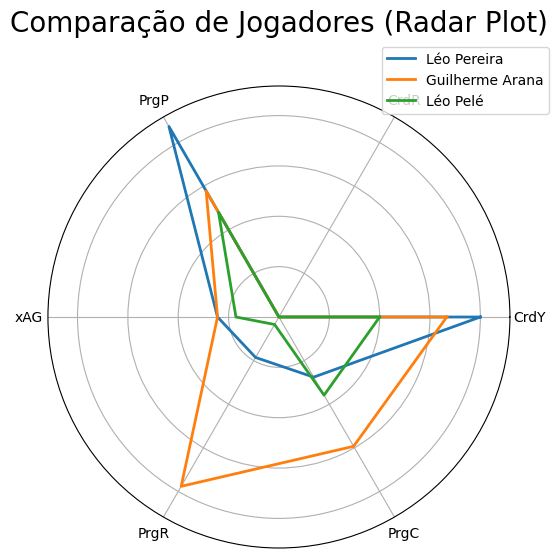

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Carregar o dataset
df = pd.read_csv("BR24PLAYERS.txt", sep='\t')

# Filtrando apenas as colunas relevantes
columns = ['Player', 'CrdY', 'CrdR', 'PrgP', 'xAG', 'PrgR', 'PrgC']
df = df[columns]

# Verificar se todos os jogadores estão na lista antes de prosseguir
players_to_compare = ['Léo Pereira', 'Guilherme Arana', 'Léo Pelé']

# Normalizando os dados para as colunas relevantes
attributes = ['CrdY', 'CrdR', 'PrgP', 'xAG', 'PrgR', 'PrgC']
normalized_data = df[attributes].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Função para criar o gráfico de radar
def radar_plot(df, normalized_data, attributes, player_names):
    num_vars = len(attributes)

    # Ângulo das variáveis no gráfico
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o gráfico no primeiro ponto

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for player in player_names:
        if player not in df['Player'].values:
            print(f"Jogador {player} não encontrado no DataFrame!")
            continue

        # Pegando apenas UMA linha correspondente ao jogador
        player_row = df[df['Player'] == player]

        if player_row.empty:
            print(f"Dados não disponíveis para {player}")
            continue

        values = normalized_data.loc[player_row.index[0], attributes].values.flatten().tolist()

        # Garantir que os valores tenham o mesmo tamanho que os ângulos
        if len(values) != num_vars:
            print(f"Número de atributos não corresponde para {player}. Esperado {num_vars}, mas obteve {len(values)}")
            continue

        values += values[:1]  # Fechar o gráfico no primeiro ponto

        ax.plot(angles, values, label=player, linewidth=2, linestyle='solid')

    # Adicionando título e labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, rotation=45)

    plt.title('Comparação de Jogadores (Radar Plot)', size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Gerando o radar plot
radar_plot(df, normalized_data, attributes, players_to_compare)


Para os zagueiros, perceba como ao analisar a progressão, o lateral Arana se destaca justamente por se movimentar mais que zagueiros de ofício como Léo Pelé e Léo Pereira. Ainda assim, a progessão de passe é maior no atleta Léo Pereira, justamente por ser o primeiro a receber a bola na saída de jogo e entregá-la aos meias.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

Observando os 3 radares, percebemos que o atributo de progressão em campo é muito relevante para todas as posições, justamente porque todas elas participam na criação da jogada e tem como objetivo aproximar a bola do gol do oponente. A posição de defensor acaba sendo a mais difícil de se analisar, justamente porque laterais e zagueiros encaixam-se como defensores e suas participações no jogo acabam sendo bem diferentes. No geral, o radar acaba comprovando como jogadores que aparentam serem influentes no jogo acabam realmente mostrando isso nos números, por exemplo, a participação do meia Arrascaeta é fundamental no time do Flamengo, superando em diversos atributos os outros meias do campeonato.-